# Atividades

## Analisando dados de ocorrências de feminicídio na cidade de São Paulo

Algumas perguntas com relação ao dataset podem ser respondidas
- Como os índices de feminicídio evoluíram em relação ao tempo e como podem evoluir nos próximos anos?
- Quais foram os períodos com maiores taxas nos últimos anos?
- Quais são os logradouros, tipos de locais, bairros e regiões com maiores índices?
- Quais são os dias da semana, horários com maiores índices?

Dataset disponível em: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

-----------
**<font color="red">Importante</font>**

    A análise faz uso de dados referente as ocorrências de feminicídio na cidade de São Paulo no período de Abril de 2015 a Junho de 2019.
    Ao todo, são 51 meses, em que possuem 1004 registros distribuídos ao longo dos mesmos.
    
--------

In [1]:
# Importando bibliotecas

import pandas as pd
import glob as gl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leitura dos dados
# Concatenação dos dados durante a leitura em uma variável chamada de 'data'

path = 'Feminicidio'
all_files = gl.glob(path + "/*.xls")

data = pd.DataFrame()

for filename in all_files:
    file = pd.read_csv(filename, sep='\t', encoding='utf-16-le')
    data = pd.concat([data, file], axis=0, ignore_index=True)

## Pré-processamento

Antes de analisar, caso necessário, realiza um procedimento de limpeza de dados, como remover duplicados, tratar strings, converter dados para outros formatos, criar novas colunas como dia do mês, da semana e mês.

**P.S.**: *Essa pode ser a fase mais demorada de todo o desafio.*

------
**<font color="red">Importante</font>**

    Antes da análise dos dados, alguns conteúdos inicialmente vazios e que não são de grande importancia, será removido do dataset
    
    Foram removidas as colunas que contém algum dado faltante. Os mesmos se mostram desnecessários na análise em questão e sua falta não influenciará no processo final.
    
----

In [3]:
# REMOVENDO DADOS DUPLICADOS PELO NÚMERO DO BOLETIM DE OCORRÊNCIA
data = data.drop_duplicates(subset='NUMERO_BOLETIM')

In [4]:
# PREENCHENDO DADOS FALTANTES DE IDADE COM A MÉDIA DAS IDADES EXISTENTES
data['IDADE'].fillna((data['IDADE'].mean()), inplace=True)

# ARREDONDANDO AS IDADES E TRANSFORMANDO EM INTEIRO
data['IDADE'] = round(data['IDADE']).values.astype(np.int64)

In [5]:
# PREENCHENDO DADOS VAZIOS COM 'DESCONHECIDO' NOS DADOS FALTANTES PARA 'CIDADE' E 'BAIRRO'.
data['BAIRRO'].fillna('DESCONHECIDO', inplace=True)
data['CIDADE'].fillna('DESCONHECIDO', inplace=True)

# PREENCHENDO DADOS VAZIOS COM 'SP' PARA 'UF' FALTANTE
data['UF'].fillna('SP', inplace=True)

# *Poucas ocorrencias desses dados faltantes

In [6]:
# REMOVENDO DADOS FALTANTES EM COLUNAS QUE SERÃO DESNECESSÁRIAS PARA A ANÁLISE
data = data.dropna(axis=1)

In [7]:
# REMOVENDO MANUALMENTE OUTRAS COLUNAS QUE NÃO TERÃO IMPORTANCIA NA ANÁLISE
data.drop(['BO_INICIADO', 'BO_EMITIDO', 'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'DESCRICAOLOCAL', 'SOLUCAO', 'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA', 'STATUS', 'ANO_FABRICACAO', 'ANO_MODELO'], inplace=True, axis=1)

In [8]:
# TRANSFORMANDO STRINGS PARA LOWER CASE
data = data.apply(lambda x: x.astype(str).str.lower())

In [9]:
# TRANSFORMANDO DADOS TEMPORAIS NO TIPO APROPRIADO
data['DATAOCORRENCIA'] = pd.to_datetime(data['DATAOCORRENCIA'], format='%d/%m/%Y')
data['MES'] = pd.DatetimeIndex(data['DATAOCORRENCIA']).month

In [10]:
data.sort_values(['ANO_BO', 'NUM_BO'], inplace=True)

## Análise Exploratória

Agora é a hora de descobrir relações e algumas *hidden informations* do dataset. 

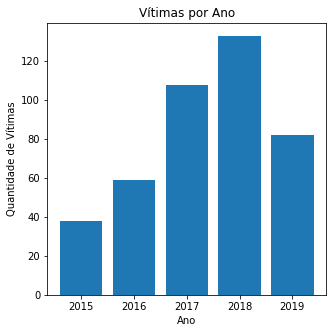

In [11]:
# COMO OS ÍNDICES DE FEMINICÍDIO EVOLUÍRAM EM RELAÇÃO AO TEMPO E COMO PODEM EVOLUIR NOS PRÓXIMOS ANOS?
%matplotlib inline

# data['ANO_BO'].value_counts().plot(kind='bar')

ano = data['ANO_BO']

ano_sum = ano.value_counts()
ano_sum = ano_sum.sort_index()

x = ano_sum.index
y = ano_sum

plt.figure(figsize=(5, 5))
plt.bar(x,y)
plt.title('Vítimas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Vítimas')
plt.xticks(x)
plt.show()
plt.close()

**<font color="red">Dados relativos ao período de 04/2015 a 06/2019 </font>**

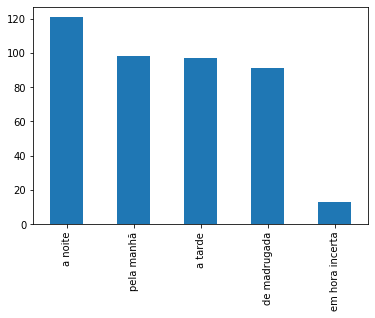

In [12]:
# QUAIS FORAM OS PERÍODOS COM MAIORES TAXAS NOS ÚLTIMOS ANOS?

%matplotlib inline

data['PERIDOOCORRENCIA'].value_counts().plot(kind='bar')

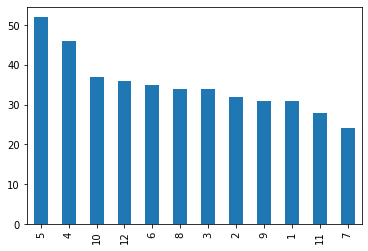

In [13]:
# ÍNDICES POR MÊS

%matplotlib inline

data['MES'].value_counts().plot(kind='bar')

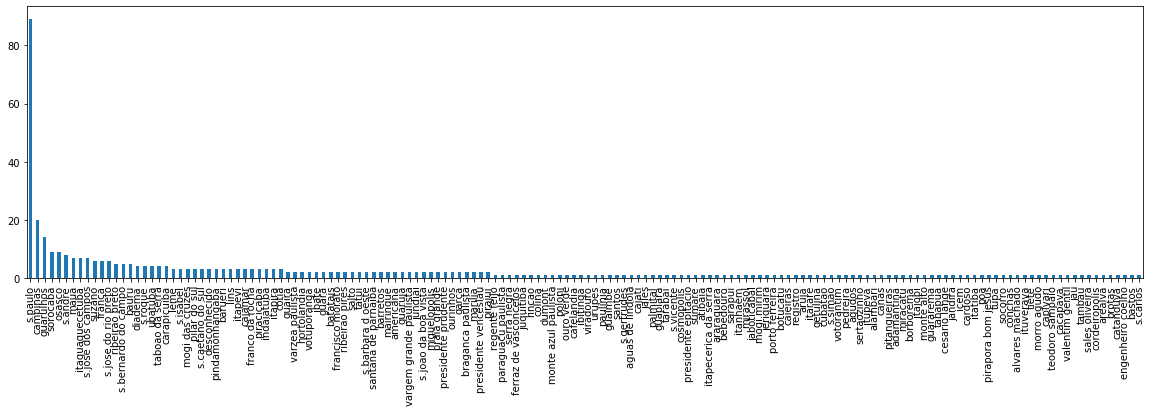

In [14]:
# QUAIS SÃO OS LOGRADOUROS,TIPOS DE LOCAIS, BAIRROS E REGIÕES COM MAIORES ÍNDICES?

%matplotlib inline

data['CIDADE'].value_counts().plot(kind='bar', figsize=(20,5))

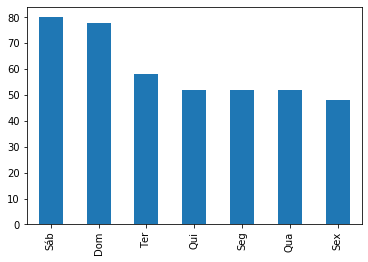

In [15]:
# QUIAS SÃO OS DIAS DA SEMANA, HORÁRIOS COM MAIORES ÍNDICES?

%matplotlib inline

sem = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
DS = lambda x: sem[x.dayofweek]
data['DIASEMANA'] = data['DATAOCORRENCIA'].apply(DS)
data['DIASEMANA'].value_counts().plot(kind='bar')

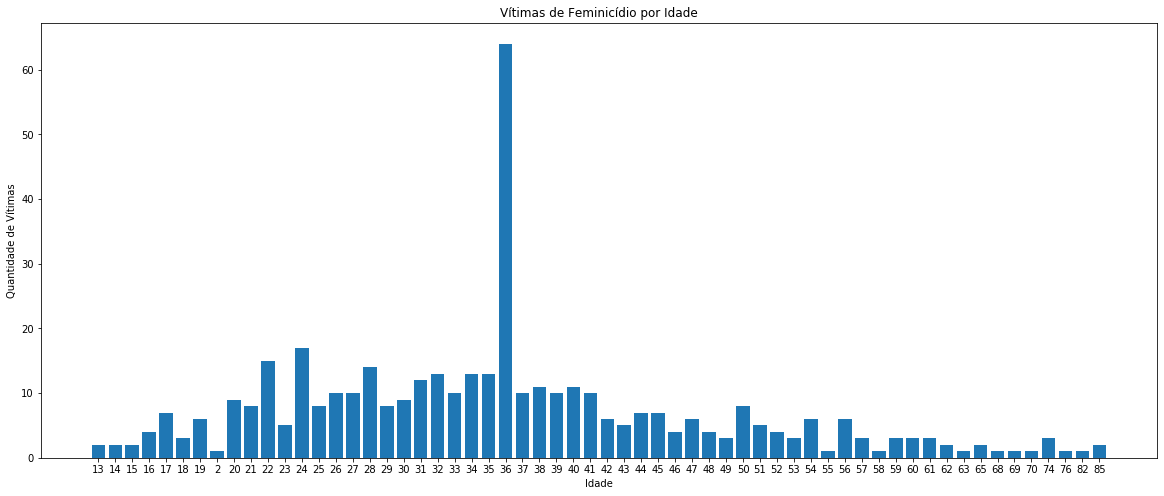

In [16]:
# DISTRIBUIÇÃO DAS AGRESSÕES POR IDADE

%matplotlib inline

da = data.sort_values(by=['IDADE'])
# da['IDADE'].value_counts().plot(kind='barh', figsize=(10,10), grid=True)

# data['IDADE'].hist(grid=True,bins=100)
# da
idade = data['IDADE']

idade_sum = idade.value_counts()
idade_sum = idade_sum.sort_index()

x = idade_sum.index
y = idade_sum

plt.figure(figsize=(20, 8))
plt.bar(x,y)
plt.title('Vítimas de Feminicídio por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Vítimas')
plt.show()
plt.close()

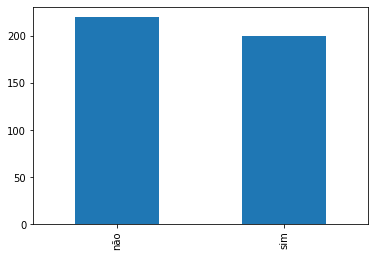

In [17]:
# QUANTIDADE DE BO'S REGISTRADOS EM FLAGRANTE

%matplotlib inline

data['FLAGRANTE'].value_counts().plot(kind='bar')

In [18]:
# EXPORTAR RESULTADO OBTIDO DOS DADOS COMO .csv
data.to_csv(r'Feminicidio/df.csv')